In [25]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [26]:
import matplotlib.pyplot as plt

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
# Load the cleaned CSV file into a DataFrame
df = pd.read_csv('cleaned_reddit_submissions.csv')


In [29]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [30]:
# Compute sentiment scores for each submission
sentiment_scores = df['Content'].apply(lambda x: sia.polarity_scores(x))


In [32]:
# Add sentiment scores to the DataFrame
df['Negative'] = [score['neg'] for score in sentiment_scores]
df['Neutral'] = [score['neu'] for score in sentiment_scores]
df['Positive'] = [score['pos'] for score in sentiment_scores]
df['Compound'] = [score['compound'] for score in sentiment_scores]

In [33]:
# Classify sentiment based on the compound score
df['Sentiment'] = df['Compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


In [34]:
df

,Title,Content,Negative,Neutral,Positive,Compound,Sentiment
0,Everyone laid off in my tech company this week..,tech company bought another company late 22 wo...,0.081,0.808,0.111,0.8587,Positive
1,No one thinks this has anything to do with lay...,im 7 months search ive definitely seen dark ho...,0.000,0.650,0.350,0.9102,Positive
2,This is why layoff have consequences,httpswwwcnncom20240222techattcellserviceoutage...,0.140,0.651,0.209,0.5030,Positive
3,Corporate America Has Abused the H1B Visa Program,program created bring experts program heavily ...,0.195,0.561,0.244,0.2023,Positive
4,I am done with tech.,field bring joy rather immense stress cycle la...,0.046,0.693,0.261,0.9001,Positive
...,...,...,...,...,...,...,...
798,Laid off and insurance terminated immediately.,common thought family would covered end month ...,0.123,0.877,0.000,-0.1027,Negative
799,Anaconda,approx 10 staff laid laid roles include produc...,0.000,0.880,0.120,0.1280,Positive
800,Healthcare heroes no more…,nextcare reduced 538 people today ceo apparent...,0.000,1.000,0.000,0.0000,Neutral
801,Tech layoffs,news tech layoffs coming everydayi see lot pos...,0.000,1.000,0.000,0.0000,Neutral


In [35]:
# Count the number of submissions for each sentiment
sentiment_counts = df['Sentiment'].value_counts()


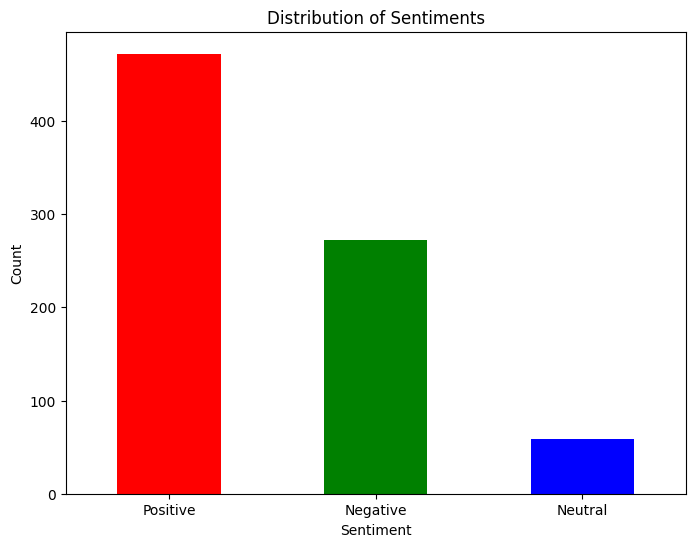

In [36]:
# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

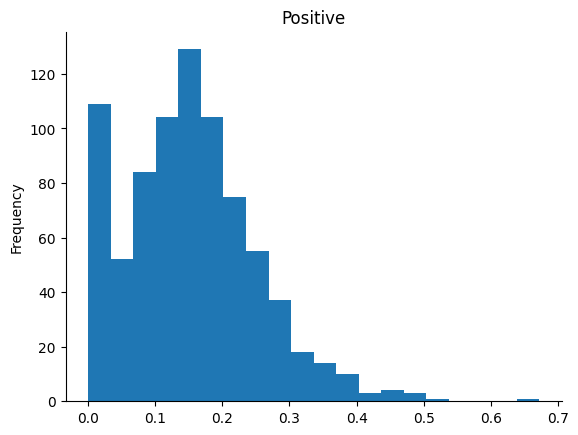

In [37]:
# @title Positive

from matplotlib import pyplot as plt
df['Positive'].plot(kind='hist', bins=20, title='Positive')
plt.gca().spines[['top', 'right',]].set_visible(False)

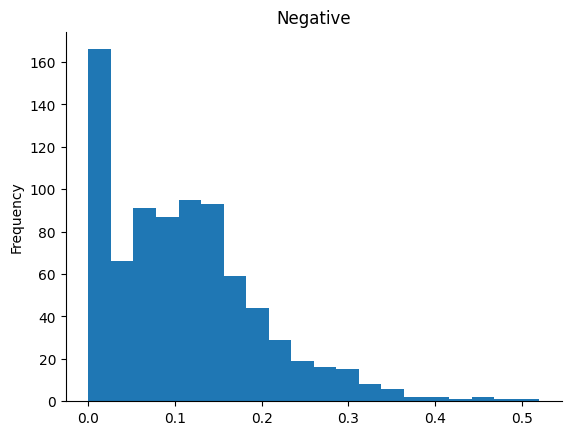

In [38]:
# @title Negative

from matplotlib import pyplot as plt
df['Negative'].plot(kind='hist', bins=20, title='Negative')
plt.gca().spines[['top', 'right',]].set_visible(False)

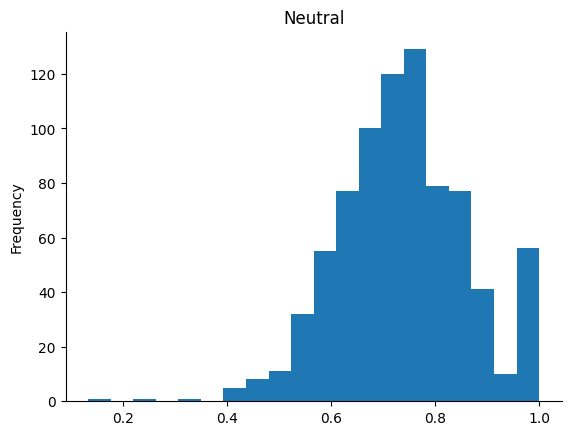

In [39]:
# @title Neutral

from matplotlib import pyplot as plt
df['Neutral'].plot(kind='hist', bins=20, title='Neutral')
plt.gca().spines[['top', 'right',]].set_visible(False)

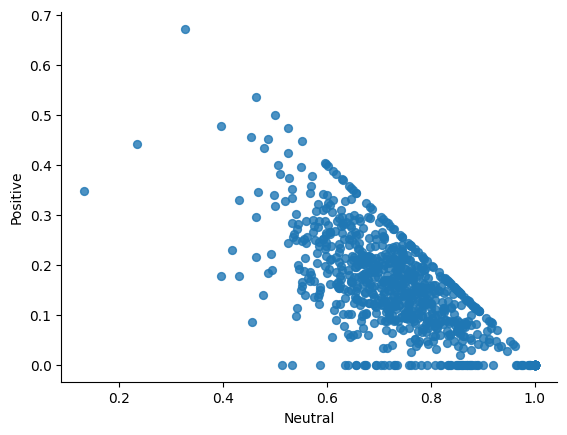

In [40]:
# @title Neutral vs Positive

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Neutral', y='Positive', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

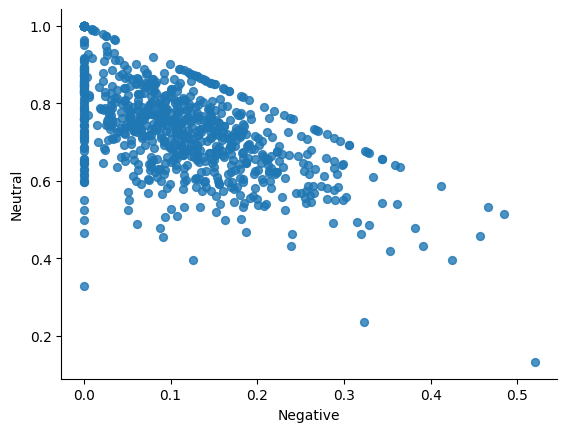

In [41]:
# @title Negative vs Neutral

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Negative', y='Neutral', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Positive', ylabel='Negative'>

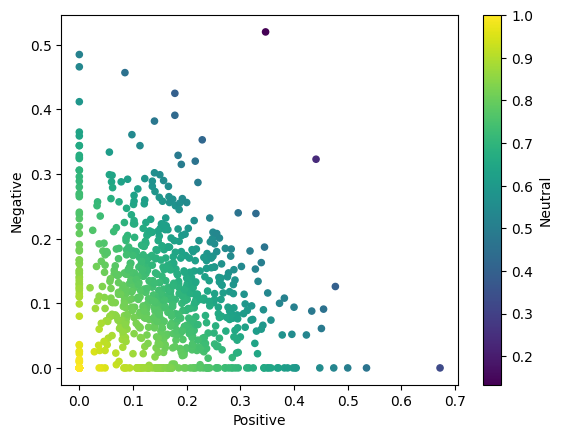

In [42]:
# @title Sentiment score correlations

df.plot.scatter(x='Positive', y='Negative', c='Neutral')

In [43]:
# Save the DataFrame with sentiment analysis results
#df.to_csv('reddit_submissions_with_sentiment.csv', index=False)